# 0.Import Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.Load Dataset

In [2]:
food_consumption = pd.read_csv('Data\\food_consumption.csv')

# 2.Measures of Center : Mean, Median, Mode

In [3]:
# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean consumption in USA
print(np.mean(usa_consumption['consumption']))

# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


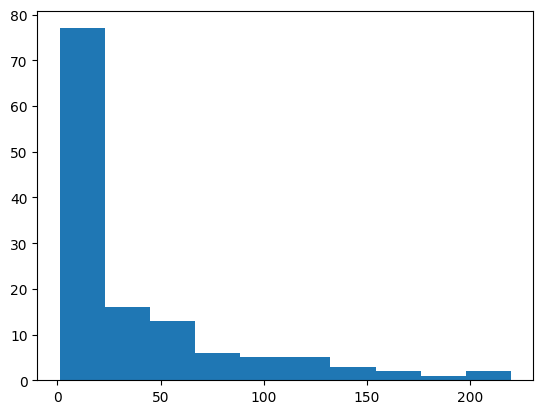

In [4]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# 3.Measures of Spread : Varience, STD, IQR

In [5]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


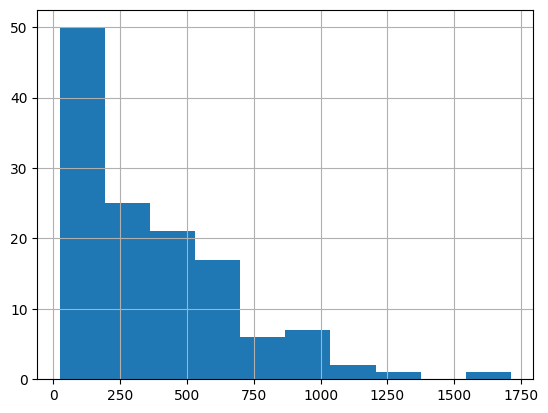

In [6]:
# Create histogram of co2_emission for food_category 'beef
food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist()
plt.show()

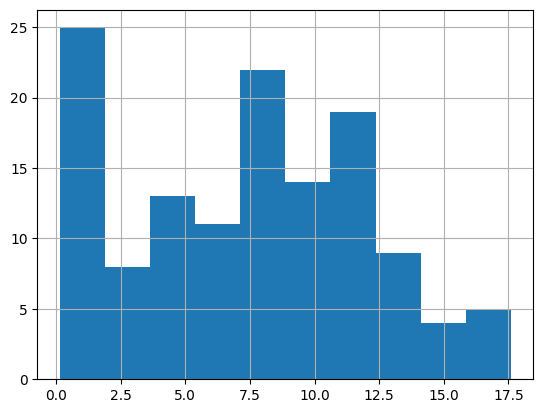

: 

: 

: 

: 

In [ ]:
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs']['co2_emission'].hist()
plt.show()

In [7]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], 0.5))

16.53


In [8]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [9]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [10]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# 4.Sampling
## 4.1 Sampling without replacement

In [11]:
food_consumption.sample(2)

,Unnamed: 0,country,food_category,consumption,co2_emission
1349,1350,Thailand,wheat,10.93,2.08
836,837,Egypt,pork,0.02,0.07


In [12]:
np.random.seed(10)
food_consumption.sample(2)

,Unnamed: 0,country,food_category,consumption,co2_emission
820,821,Trinidad and Tobago,dairy,103.80,147.85
35,36,Iceland,beef,13.36,412.26


## 4.2 Sampling with replacement

In [13]:
food_consumption.sample(2,replace=True)

,Unnamed: 0,country,food_category,consumption,co2_emission
1267,1268,Nigeria,beef,2.33,71.90
776,777,Saudi Arabia,dairy,83.65,119.15


# 5.Calculating Probabilities
**We will calculate probability of each product accuring in "amir_deals" data**

In [14]:
amir_deals = pd.read_csv('Data\\amir_deals.csv')

In [15]:
probs = amir_deals['product'].value_counts() / amir_deals.shape[0]
probs

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64

In [16]:
amir_deals.groupby('product').count() / amir_deals.shape[0]

,Unnamed: 0,client,status,amount,num_users
product,,,,,
Product A,0.129213,0.129213,0.129213,0.129213,0.129213
Product B,0.348315,0.348315,0.348315,0.348315,0.348315
Product C,0.084270,0.084270,0.084270,0.084270,0.084270
Product D,0.224719,0.224719,0.224719,0.224719,0.224719
Product E,0.028090,0.028090,0.028090,0.028090,0.028090
Product F,0.061798,0.061798,0.061798,0.061798,0.061798
Product G,0.011236,0.011236,0.011236,0.011236,0.011236
Product H,0.044944,0.044944,0.044944,0.044944,0.044944
Product I,0.039326,0.039326,0.039326,0.039326,0.039326


<Axes: >

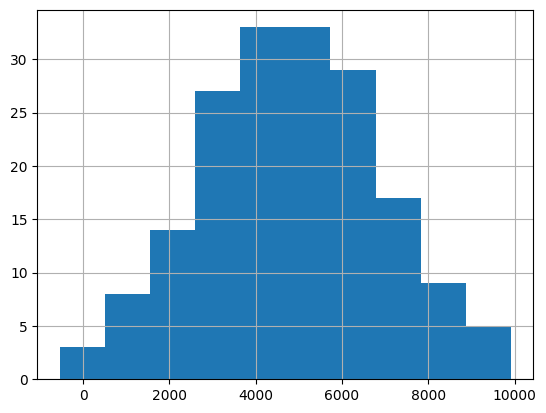

In [17]:
amir_deals.amount.hist()

In [18]:
amir_deals.describe()

,Unnamed: 0,amount,num_users
count,178.000000,178.000000,178.000000
mean,89.500000,4812.000337,37.651685
std,51.528309,2058.173225,27.354794
min,1.000000,-539.230000,1.000000
25%,45.250000,3415.927500,14.250000
50%,89.500000,4805.190000,32.500000
75%,133.750000,6217.257500,58.000000
max,178.000000,9913.270000,99.000000


# Central Limit Theorem 

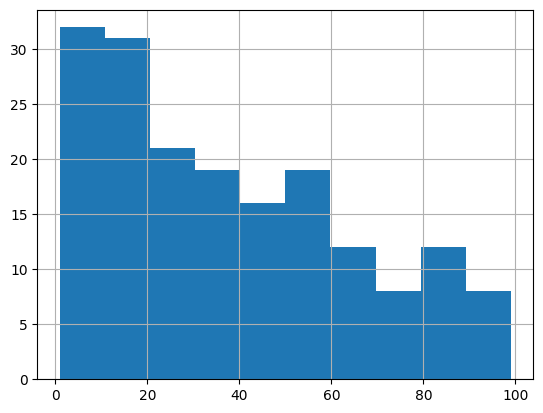

In [19]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

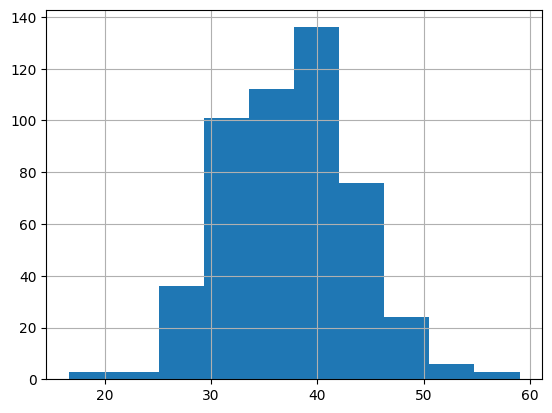

In [20]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(500):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

# Poisson Distributions
### 1) Calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

In [21]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


### 2) Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [22]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


### 3) What's the probability that Amir responds to 2 or fewer leads in a day?

In [23]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


### 4) What's the probability that Amir responds to more than 10 leads in a day?

In [24]:
# Probability of > 10 responses
prob_over_10 = 1-poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315
